In [4]:
import pyspark

In [5]:
from pyspark.sql import SparkSession


In [6]:
spark = SparkSession.builder \
    .appName("FloodDataApp") \
    .getOrCreate()


In [7]:
#Read file in pyspark
df = spark.read.csv(r"C:\Users\Pratiksha\Downloads\flood_final.csv", header=True, inferSchema=True)


In [8]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_columns = len(df.columns)

# Print the shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 1117957
Number of columns: 23


In [9]:
# Fetch the first 5 rows as a list of Row objects
rows = df.head(5)
for row in rows:
    print(row)


Row(MonsoonIntensity=0.0393345148291828, TopographyDrainage=1.4670109266599087, RiverManagement=0.0206543923096514, Deforestation=1.489347771024752, Urbanization=0.5085175900790466, ClimateChange=-0.4536980562820389, DamsQuality=-0.4588272583471168, Siltation=-0.9326974652307136, AgriculturalPractices=-0.9387611947122398, Encroachments=-0.4560372440179018, IneffectiveDisasterPreparedness=-1.4168025422167014, DrainageSystems=0.0261844474620056, CoastalVulnerability=-0.9360556312096048, Landslides=None, Watersheds=0.0337496119717057, DeterioratingInfrastructure=-0.4483803415583203, PopulationScore=0.9993846624951696, WetlandLoss=0.0242384591509072, InadequatePlanning=0.9900216280780096, PoliticalFactors=-0.9290644752440006, FloodProbability=0.445, ClimateAnthropogenicInteraction=189.0, InfrastructurePreventionInteraction=182.0)
Row(MonsoonIntensity=0.5256328392358458, TopographyDrainage=0.9894500470032456, RiverManagement=-0.4619709440794398, Deforestation=-0.4599184696798111, Urbanizati

In [10]:
df.show(5)

+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+---------------------+-------------------+-------------------------------+------------------+--------------------+-------------------+-------------------+---------------------------+-------------------+-------------------+-------------------+-------------------+----------------+-------------------------------+-----------------------------------+
|  MonsoonIntensity| TopographyDrainage|    RiverManagement|      Deforestation|       Urbanization|      ClimateChange|        DamsQuality|          Siltation|AgriculturalPractices|      Encroachments|IneffectiveDisasterPreparedness|   DrainageSystems|CoastalVulnerability|         Landslides|         Watersheds|DeterioratingInfrastructure|    PopulationScore|        WetlandLoss| InadequatePlanning|   PoliticalFactors|FloodProbability|ClimateAnthropogenicInteraction|InfrastructurePrevent

# statistical insight from data

In [11]:
#Get Column Names and Data Types: To list all column names and their data types:
columns = df.columns
types = [field.dataType for field in df.schema.fields]

print("Columns and Data Types:")
for column, data_type in zip(columns, types):
    print(f"{column}: {data_type}")


Columns and Data Types:
MonsoonIntensity: DoubleType()
TopographyDrainage: DoubleType()
RiverManagement: DoubleType()
Deforestation: DoubleType()
Urbanization: DoubleType()
ClimateChange: DoubleType()
DamsQuality: DoubleType()
Siltation: DoubleType()
AgriculturalPractices: DoubleType()
Encroachments: DoubleType()
IneffectiveDisasterPreparedness: DoubleType()
DrainageSystems: DoubleType()
CoastalVulnerability: DoubleType()
Landslides: DoubleType()
Watersheds: DoubleType()
DeterioratingInfrastructure: DoubleType()
PopulationScore: DoubleType()
WetlandLoss: DoubleType()
InadequatePlanning: DoubleType()
PoliticalFactors: DoubleType()
FloodProbability: DoubleType()
ClimateAnthropogenicInteraction: DoubleType()
InfrastructurePreventionInteraction: DoubleType()


In [12]:
df.describe().show()


+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------------------+-----------------------------------+
|summary|    MonsoonIntensity|  TopographyDrainage|     RiverManagement|       Deforestation|        Urbanization|       ClimateChange|         DamsQuality|           Siltation|AgriculturalPractices|       Encroachments|IneffectiveDisasterPreparedness|     DrainageSystems|CoastalVulnerability|          Landslides|          Watersheds|DeterioratingInfrastructure|     PopulationScore|         WetlandLoss|  InadequatePlanning|    PoliticalFactors|   FloodProbabi

In [13]:
from pyspark.sql.functions import col

# Get descriptive statistics for numeric columns
df.describe().show()

# For categorical columns, you can calculate count of unique values, etc.
categorical_columns = [col_name for col_name, dtype in df.dtypes if dtype == 'string']
for col_name in categorical_columns:
    df.groupBy(col_name).count().show()


+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+-------------------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------------------+-----------------------------------+
|summary|    MonsoonIntensity|  TopographyDrainage|     RiverManagement|       Deforestation|        Urbanization|       ClimateChange|         DamsQuality|           Siltation|AgriculturalPractices|       Encroachments|IneffectiveDisasterPreparedness|     DrainageSystems|CoastalVulnerability|          Landslides|          Watersheds|DeterioratingInfrastructure|     PopulationScore|         WetlandLoss|  InadequatePlanning|    PoliticalFactors|   FloodProbabi

# adding one column of probability condition based on the threshold value

In [14]:
column_names = df.columns
print(column_names)

['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability', 'ClimateAnthropogenicInteraction', 'InfrastructurePreventionInteraction']


# checkig unique values from each column

In [15]:
spark = SparkSession.builder \
    .appName("FloodDataApp") \
    .config("spark.network.timeout", "600s") \
    .config("spark.executor.heartbeatInterval", "60s") \
    .getOrCreate()


In [16]:
spark = SparkSession.builder \
    .appName("FloodDataApp") \
    .config("spark.python.worker.reuse", "true") \
    .config("spark.python.worker.timeout", "600s") \
    .getOrCreate()


In [17]:
pip install --upgrade pyspark


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Pratiksha\OneDrive\Documents\Desktop\pyspark\my_venv\Scripts\python.exe -m pip install --upgrade pip


In [18]:
from pyspark.sql.functions import countDistinct

for column in df.columns:
    # Count distinct values
    distinct_count = df.select(column).distinct().count()
    
    # Show distinct count
    print(f"{column}: {distinct_count} unique values")


MonsoonIntensity: 18 unique values
TopographyDrainage: 20 unique values
RiverManagement: 18 unique values
Deforestation: 19 unique values
Urbanization: 19 unique values
ClimateChange: 19 unique values
DamsQuality: 18 unique values
Siltation: 18 unique values
AgriculturalPractices: 18 unique values
Encroachments: 20 unique values
IneffectiveDisasterPreparedness: 18 unique values
DrainageSystems: 19 unique values
CoastalVulnerability: 19 unique values
Landslides: 18 unique values
Watersheds: 18 unique values
DeterioratingInfrastructure: 19 unique values
PopulationScore: 20 unique values
WetlandLoss: 21 unique values
InadequatePlanning: 18 unique values
PoliticalFactors: 18 unique values
FloodProbability: 83 unique values
ClimateAnthropogenicInteraction: 344 unique values
InfrastructurePreventionInteraction: 304 unique values


# plots before the cleaning of the data to undersatnd the some insights

# 1.Distribution of Target Column (FloodProbability)

In [19]:
pip install setuptools


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Pratiksha\OneDrive\Documents\Desktop\pyspark\my_venv\Scripts\python.exe -m pip install --upgrade pip


In [20]:
from packaging.version import Version


In [21]:
pip install python3-distutils


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python3-distutils (from versions: none)
ERROR: No matching distribution found for python3-distutils

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Pratiksha\OneDrive\Documents\Desktop\pyspark\my_venv\Scripts\python.exe -m pip install --upgrade pip


In [22]:
from pyspark.sql.functions import col

# Get descriptive statistics
stats_df = df.select('FloodProbability').describe()
stats_df.show()


+-------+-------------------+
|summary|   FloodProbability|
+-------+-------------------+
|  count|            1117957|
|   mean| 0.5044803243774165|
| stddev|0.05102609532324062|
|    min|              0.285|
|    max|              0.725|
+-------+-------------------+



In [23]:
import distutils
print(distutils.__file__)


C:\Users\Pratiksha\OneDrive\Documents\Desktop\pyspark\my_venv\Lib\site-packages\setuptools\_distutils\__init__.py


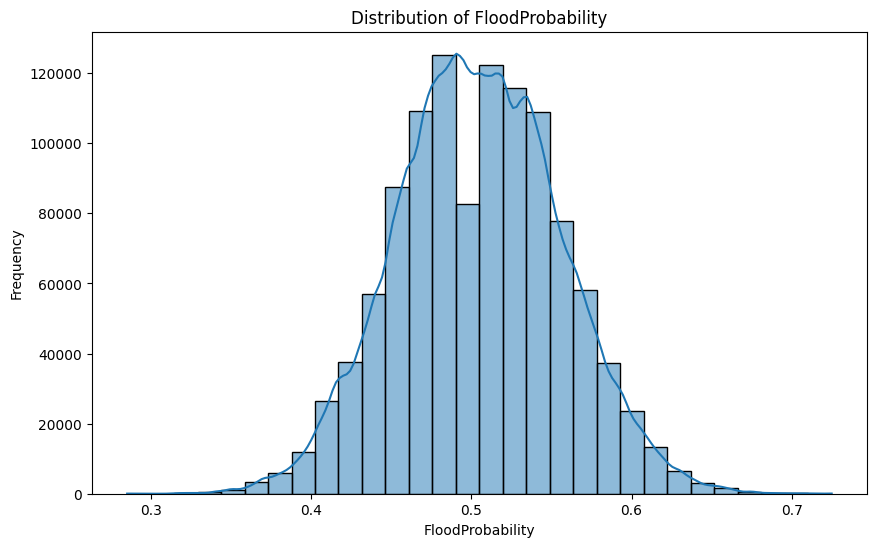

In [24]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark session
spark = SparkSession.builder.appName("FloodAnalysis").getOrCreate()

# Load your DataFrame (assuming it's already loaded as df)
# df = spark.read.csv("flood_final.csv", header=True, inferSchema=True)

# Select the 'FloodProbability' column and convert it to a Pandas DataFrame
pandas_df = df.select('FloodProbability').toPandas()

# Plotting with Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df['FloodProbability'], bins=30, kde=True)
plt.title('Distribution of FloodProbability')
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.show()


# 2. Box Plot for Outlier Detection

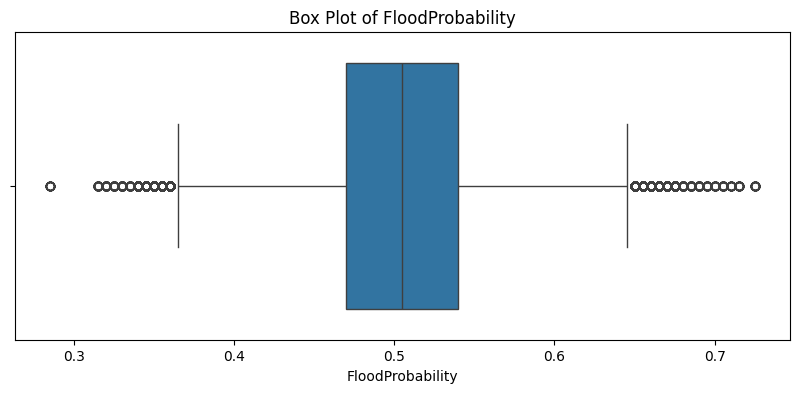

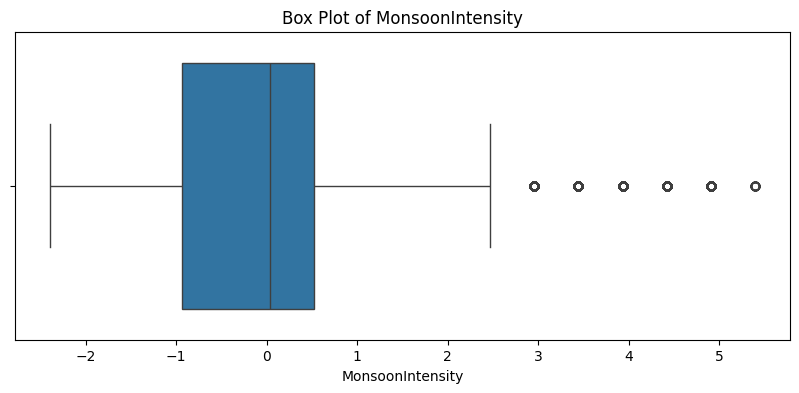

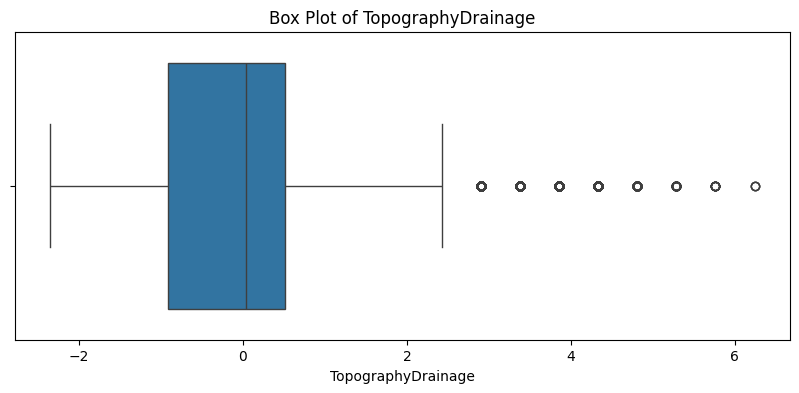

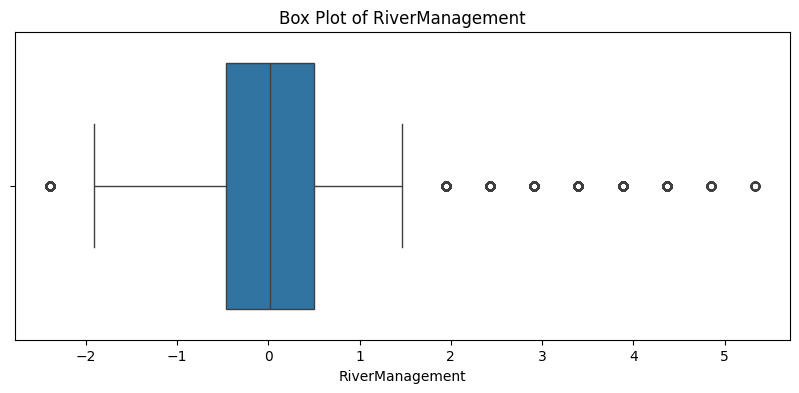

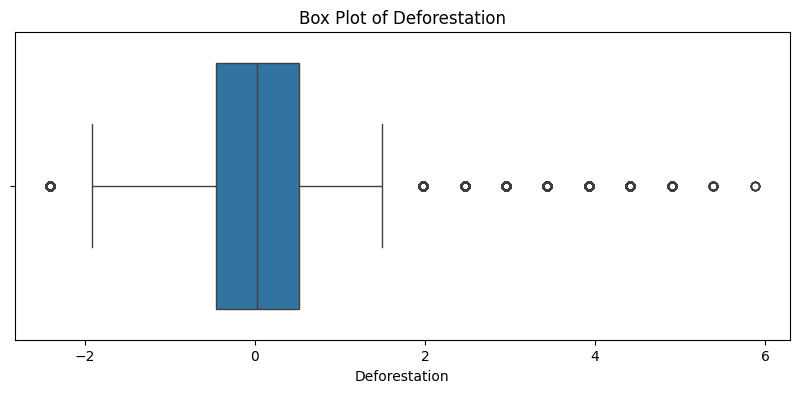

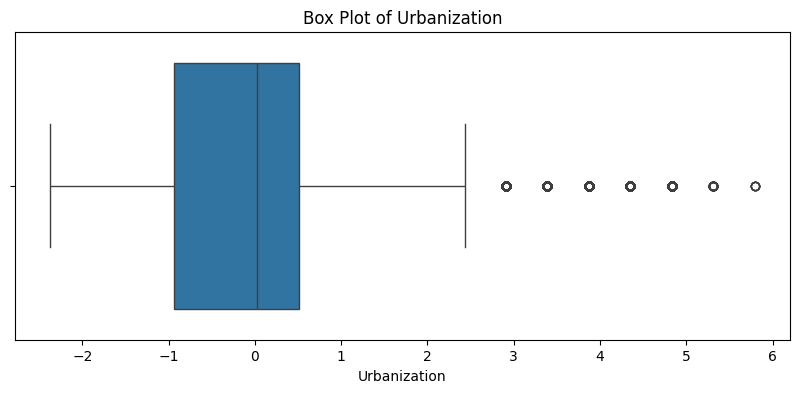

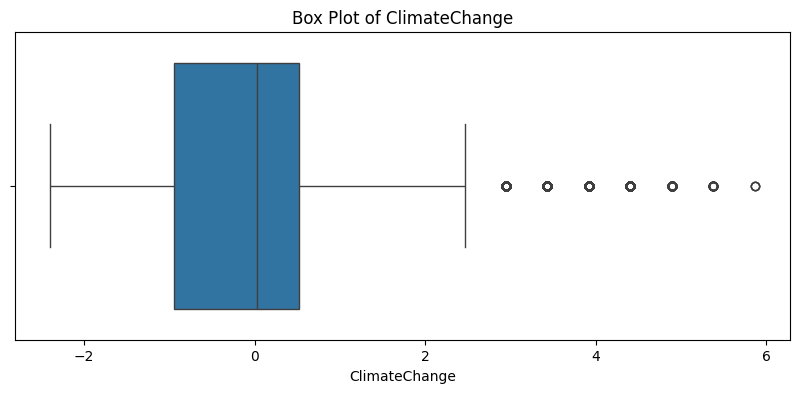

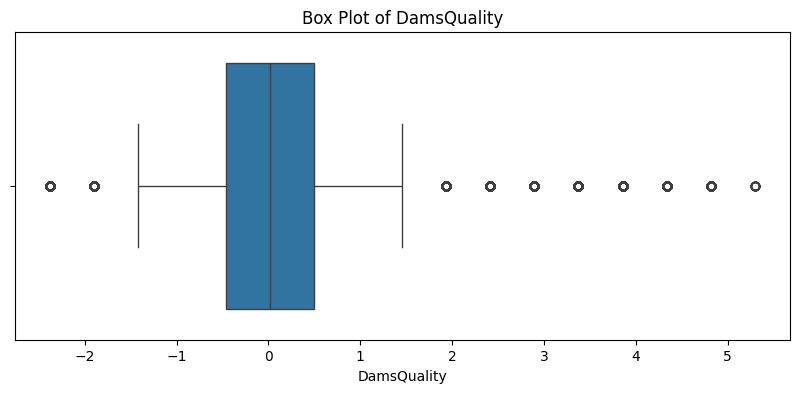

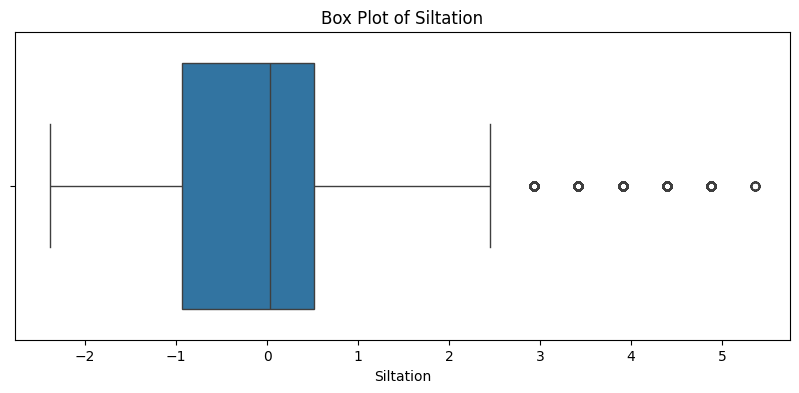

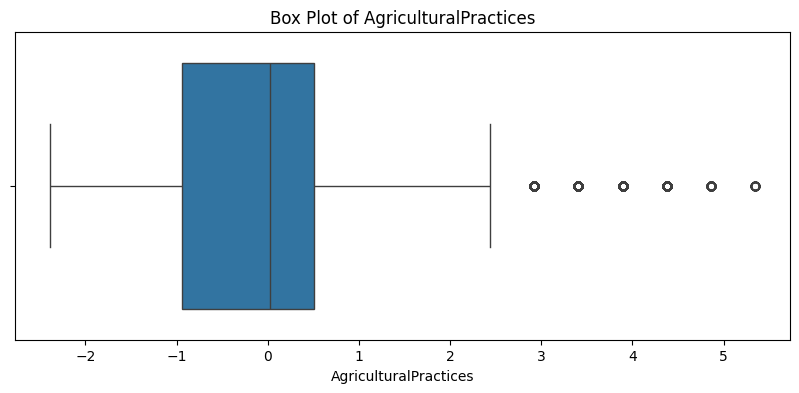

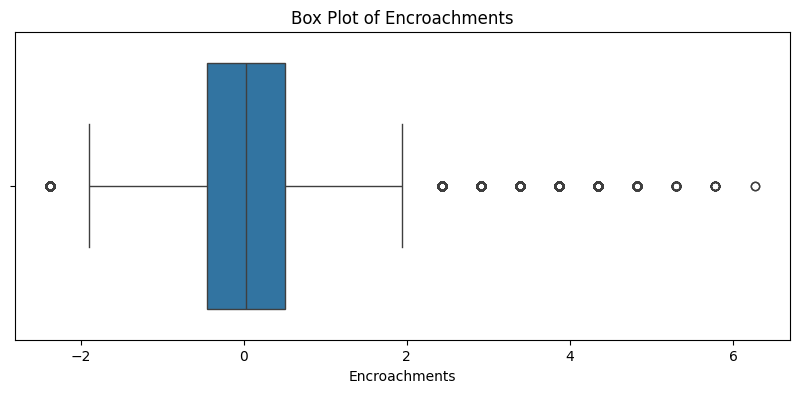

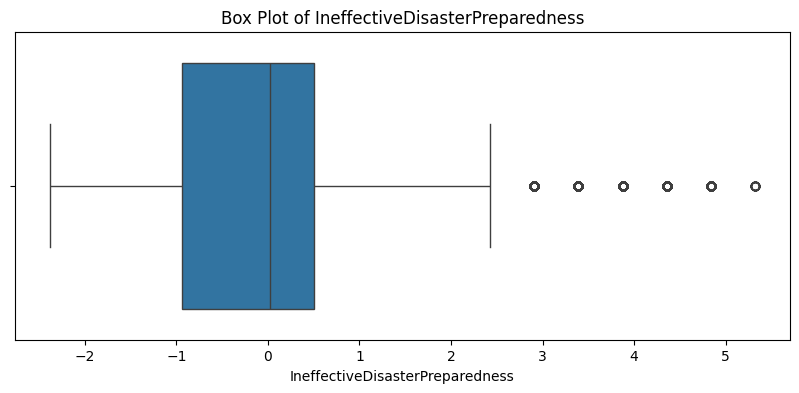

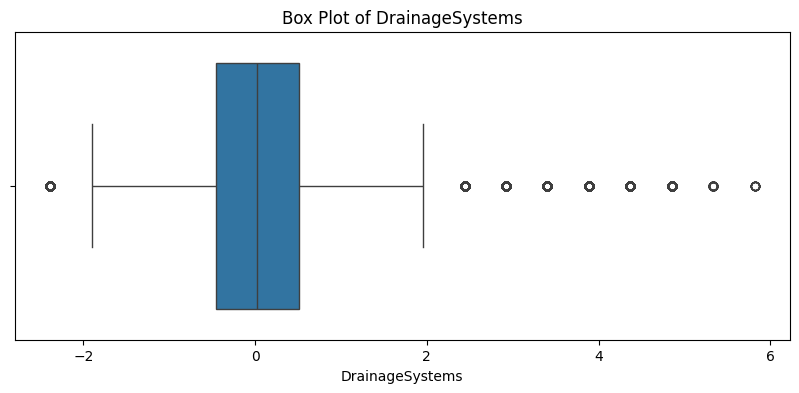

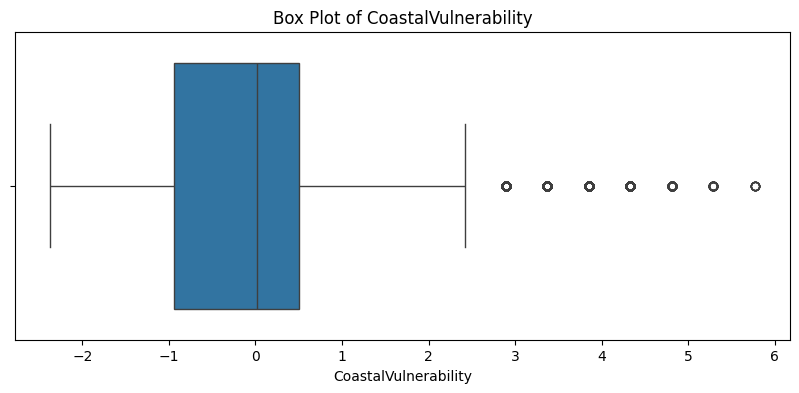

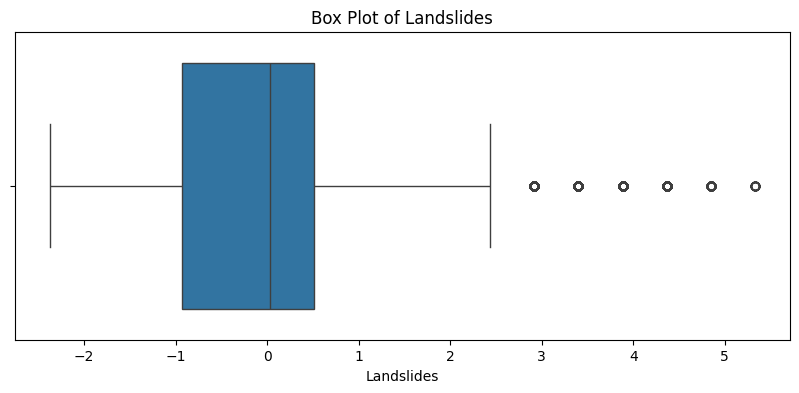

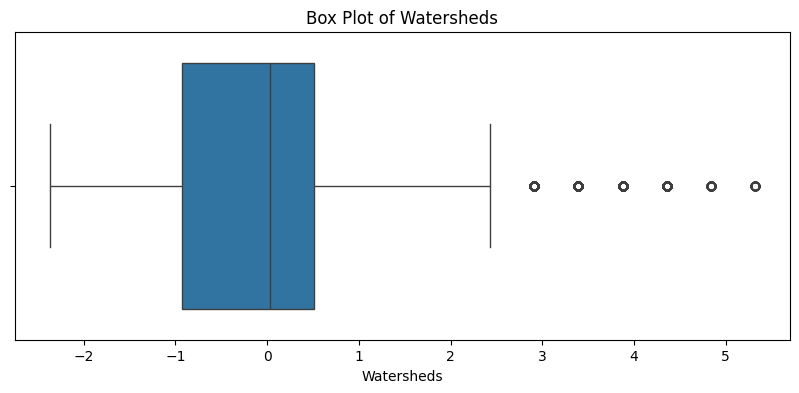

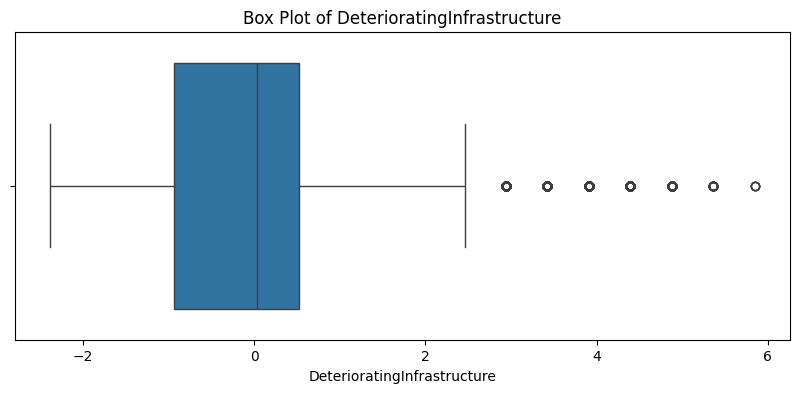

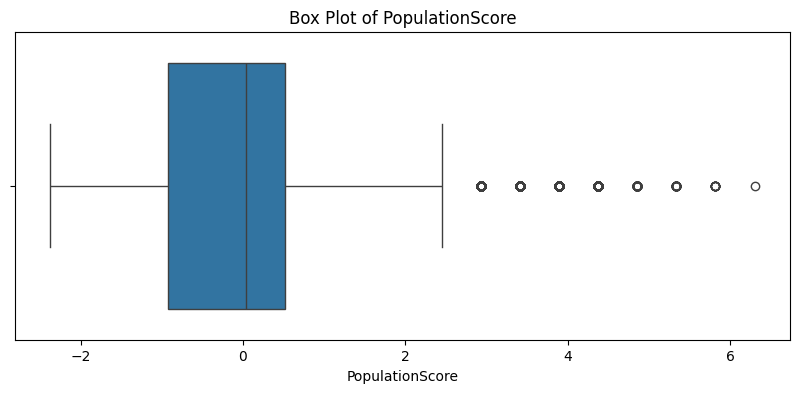

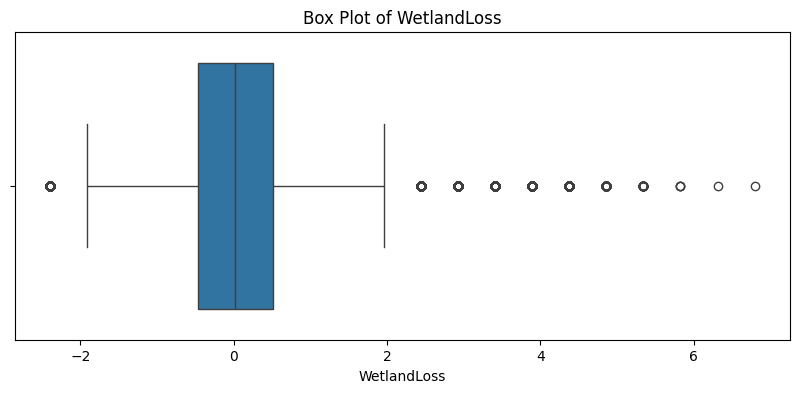

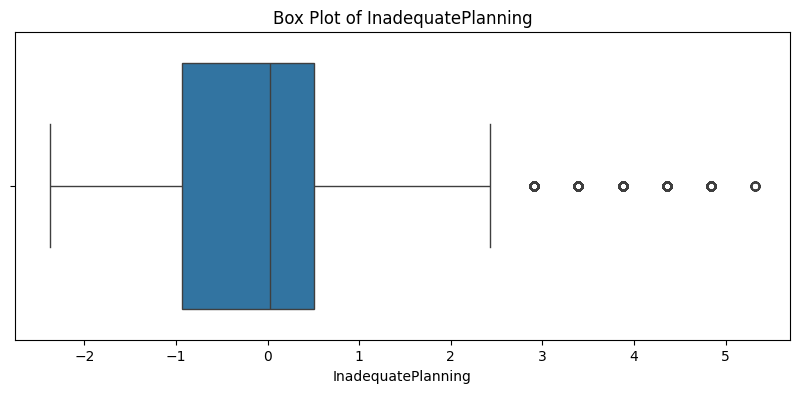

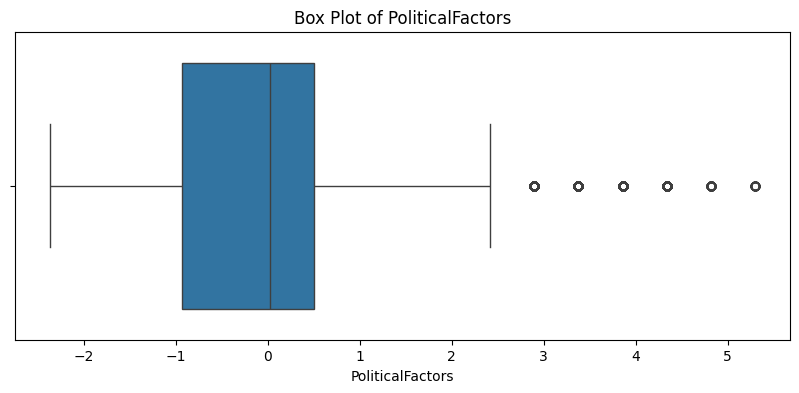

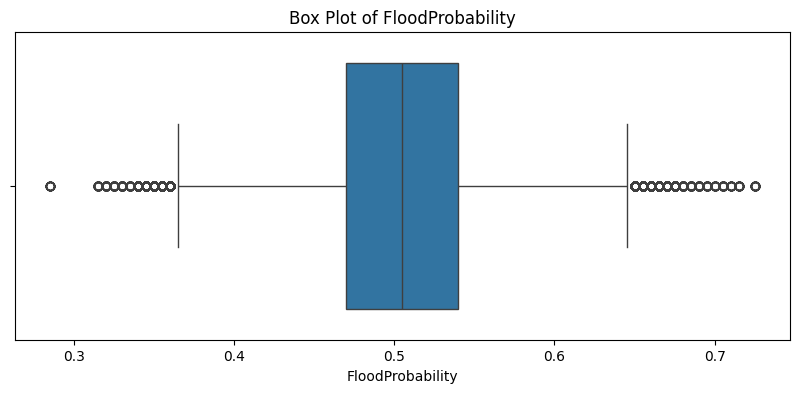

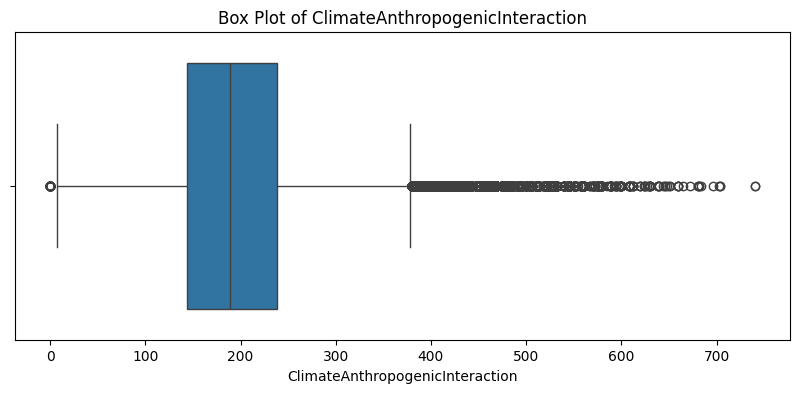

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Select the columns you need in PySpark
selected_cols = ['FloodProbability'] + df.columns[:-1]

# Step 2: Convert each selected column to Pandas DataFrame and plot
for col in selected_cols:
    pandas_df = df.select(col).toPandas()  # Convert to Pandas DataFrame
    
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=pandas_df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


# 3. class distribution plot

In [26]:
from pyspark.sql.functions import col, sum as spark_sum

# Calculate the number of nulls in each column
null_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Show the result
null_counts.show()


+----------------+------------------+---------------+-------------+------------+-------------+-----------+---------+---------------------+-------------+-------------------------------+---------------+--------------------+----------+----------+---------------------------+---------------+-----------+------------------+----------------+----------------+-------------------------------+-----------------------------------+
|MonsoonIntensity|TopographyDrainage|RiverManagement|Deforestation|Urbanization|ClimateChange|DamsQuality|Siltation|AgriculturalPractices|Encroachments|IneffectiveDisasterPreparedness|DrainageSystems|CoastalVulnerability|Landslides|Watersheds|DeterioratingInfrastructure|PopulationScore|WetlandLoss|InadequatePlanning|PoliticalFactors|FloodProbability|ClimateAnthropogenicInteraction|InfrastructurePreventionInteraction|
+----------------+------------------+---------------+-------------+------------+-------------+-----------+---------+---------------------+-------------+------

In [27]:
from pyspark.sql.functions import col, sum as spark_sum

# Calculate the total number of rows in the DataFrame
total_rows = df.count()

# Calculate the number of null values for each column
null_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Calculate the percentage of null values for each column
null_percentage = null_counts.select([(col(c) / total_rows * 100).alias(c) for c in df.columns])

# Show the result
null_percentage.show()


+-----------------+------------------+----------------+-----------------+-----------------+------------------+------------------+------------------+---------------------+------------------+-------------------------------+-----------------+--------------------+-----------------+-----------------+---------------------------+------------------+------------------+------------------+------------------+----------------+-------------------------------+-----------------------------------+
| MonsoonIntensity|TopographyDrainage| RiverManagement|    Deforestation|     Urbanization|     ClimateChange|       DamsQuality|         Siltation|AgriculturalPractices|     Encroachments|IneffectiveDisasterPreparedness|  DrainageSystems|CoastalVulnerability|       Landslides|       Watersheds|DeterioratingInfrastructure|   PopulationScore|       WetlandLoss|InadequatePlanning|  PoliticalFactors|FloodProbability|ClimateAnthropogenicInteraction|InfrastructurePreventionInteraction|
+-----------------+---------

# Compute Correlation Matrix and heatmap for columns having null values to understand which columns to impute which to drop

In [29]:
# Option 1: Fill missing values with a specific value (e.g., 0 or mean)
df_filled = df.fillna(0, subset=columns_with_missing)

# Option 2: Drop rows with missing values in the selected columns
df_filled = df.dropna(subset=columns_with_missing)

assembler = VectorAssembler(inputCols=columns_with_missing, outputCol="features")
df_vector = assembler.transform(df_filled).select("features")

# Compute the correlation matrix
correlation_matrix = Correlation.corr(df_vector, "features").head()[0]


In [30]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=columns_with_missing, outputCol="features", handleInvalid="skip")
df_vector = assembler.transform(df).select("features")

# Compute the correlation matrix
correlation_matrix = Correlation.corr(df_vector, "features").head()[0]


In [31]:
# Convert the DenseMatrix to a NumPy array for better visualization
import numpy as np
correlation_matrix_np = np.array(correlation_matrix.toArray())

# Display the correlation matrix
print(correlation_matrix_np)

[[ 1.         -0.00749859 -0.00850891 -0.00845924 -0.00881303 -0.00864365
  -0.00903544 -0.0100204  -0.00966553 -0.0086891  -0.01012645 -0.00717301
  -0.00769652  0.566187   -0.02017847  0.18966916]
 [-0.00749859  1.         -0.01283255 -0.00928397 -0.00914836 -0.00757203
  -0.01055751 -0.01031594 -0.01250892 -0.00836816 -0.01083793 -0.0094116
  -0.01101976 -0.02056559 -0.0239848   0.18787994]
 [-0.00850891 -0.01283255  1.         -0.0096522  -0.01022758 -0.01004157
  -0.00862152 -0.01100819 -0.01307498 -0.00535764 -0.00536172 -0.00984397
  -0.0119972  -0.02170643  0.39342735  0.18785907]
 [-0.00845924 -0.00928397 -0.0096522   1.         -0.00906913 -0.01080204
  -0.012211   -0.01041583 -0.01422641 -0.00580989 -0.00962506 -0.00884734
  -0.01080089  0.56236919 -0.02275561  0.18521759]
 [-0.00881303 -0.00914836 -0.01022758 -0.00906913  1.         -0.01106297
  -0.00947756 -0.00989673 -0.0111836  -0.00654502 -0.00829337 -0.00978329
  -0.01011584 -0.02275614 -0.02256882  0.18608985]
 [-0.0

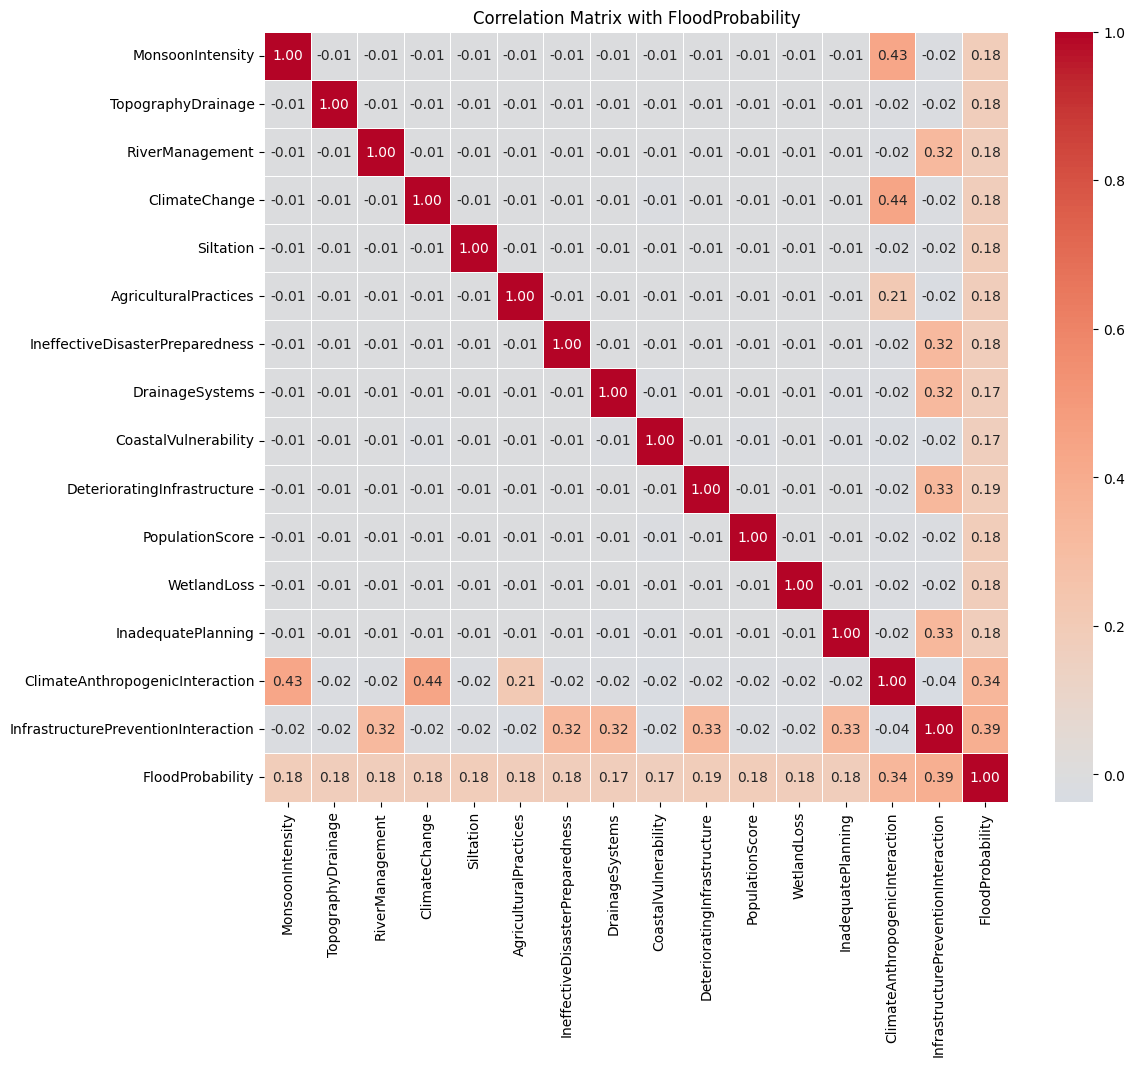

In [33]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your Spark DataFrame and columns_with_missing are the columns you want to use

# Step 1: Fill or drop null values (if not already handled)
df_filled = df.fillna(0, subset=columns_with_missing)

# Step 2: Assemble the features into a vector
assembler = VectorAssembler(inputCols=columns_with_missing, outputCol="features")
df_vector = assembler.transform(df_filled).select("features")

# Step 3: Compute the correlation matrix
correlation_matrix = Correlation.corr(df_vector, "features").head()[0]

# Step 4: Convert the DenseMatrix to a NumPy array
corr_matrix_np = correlation_matrix.toArray()

# Step 5: Convert the NumPy array to a Pandas DataFrame for easier plotting
columns_list = columns_with_missing
corr_df = pd.DataFrame(corr_matrix_np, index=columns_list, columns=columns_list)

# Step 6: Plot the heatmap using Seaborn and Matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix with FloodProbability')
plt.show()


In [34]:
columns_to_drop = ['Encroachments', 'PoliticalFactors', 'AgriculturalPractices', 'WetlandLoss', 'InadequatePlanning']
df = df.dropna(subset=columns_to_drop)


# 1.Median Imputation Code

In [35]:
from pyspark.sql.functions import col

# List of columns for which you want to fill missing values with the median
median_columns = ['Deforestation', 'Landslides', 'Watersheds']

# Calculate the median for each column and fill missing values
for column in median_columns:
    median_value = df.approxQuantile(column, [0.5], 0.01)[0]
    df = df.fillna({column: median_value})

# The DataFrame `df` now has missing values in the specified columns filled with the median


# 2.Linear Interpolation Imputation code

In [37]:
from pyspark.sql import Window
from pyspark.sql.functions import col, lag, lead, when, isnull, row_number

# Replace 'FloodProbability' with the actual column you want to use for ordering
order_column = 'FloodProbability'

# Add an index to maintain the order of rows
df = df.withColumn("index", row_number().over(Window.orderBy(order_column)))

# List of columns to interpolate
interpolate_columns = ['Urbanization', 'DamsQuality']

# Define a function to perform linear interpolation
def interpolate_column(df, column):
    # Create window specification
    window_spec = Window.orderBy('index').rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

    # Lag and lead values to find previous and next values
    df = df.withColumn('lag_value', lag(column).over(Window.orderBy('index')))
    df = df.withColumn('lead_value', lead(column).over(Window.orderBy('index')))

    # Interpolate missing values
    df = df.withColumn(
        column,
        when(
            isnull(col(column)),
            (col('lag_value') + col('lead_value')) / 2
        ).otherwise(col(column))
    )

    # Drop temporary columns used for interpolation
    df = df.drop('lag_value', 'lead_value')

    return df

# Apply interpolation for each column
for column in interpolate_columns:
    df = interpolate_column(df, column)

# Drop the temporary 'index' column if no longer needed
df = df.drop("index")


# 3.Iterative Imputation

In [40]:
from pyspark.sql.functions import col

# Filter out rows with null values in any of the columns used for features
df = df.dropna(subset=columns_to_impute_iterative)


In [41]:
from pyspark.ml.feature import Imputer

# Create an Imputer instance for each column
imputer = Imputer(inputCols=columns_to_impute_iterative, outputCols=columns_to_impute_iterative)
df = imputer.fit(df).transform(df)


In [43]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=columns, outputCol="features", handleInvalid="keep")
df = assembler.transform(df)


In [44]:
from pyspark.ml.feature import VectorAssembler, Imputer
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col, when

def iterative_impute(df, columns_to_impute):
    for column in columns_to_impute:
        other_columns = [c for c in columns_to_impute if c != column]
        
        # Impute missing values in columns used for features
        imputer = Imputer(inputCols=other_columns, outputCols=other_columns)
        df = imputer.fit(df).transform(df)
        
        # Filter out rows with nulls in the column to be predicted
        df_missing = df.filter(col(column).isNull())
        df_non_missing = df.filter(col(column).isNotNull())
        
        if df_non_missing.count() > 0 and df_missing.count() > 0:
            # Assemble features
            assembler = VectorAssembler(inputCols=other_columns, outputCol="features", handleInvalid="keep")
            df_non_missing = assembler.transform(df_non_missing)
            df_missing = assembler.transform(df_missing)
            
            # Train a Linear Regression model
            lr = LinearRegression(featuresCol="features", labelCol=column)
            model = lr.fit(df_non_missing)
            
            # Predict missing values
            predictions = model.transform(df_missing)
            
            # Fill missing values with predictions
            df = df_missing.withColumn(column, when(col(column).isNull(), col('prediction')).otherwise(col(column)))
            df = df.drop("prediction")
            
            # Re-assemble the non-missing data back
            df = df.union(df_non_missing)
    
    return df

# Apply iterative imputation
df = iterative_impute(df, columns_to_impute_iterative)


# 4.Multiple Imputation by Chained Equations (MICE)

In [45]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col, when
from pyspark.sql import DataFrame


In [46]:
def iterative_impute(df: DataFrame, columns_to_impute: list) -> DataFrame:
    for column in columns_to_impute:
        other_columns = [c for c in columns_to_impute if c != column]
        
        # Filter out rows with missing values in the current column
        df_missing = df.filter(col(column).isNull())
        df_non_missing = df.filter(col(column).isNotNull())
        
        if df_non_missing.count() > 0 and df_missing.count() > 0:
            # Assemble features
            assembler = VectorAssembler(inputCols=other_columns, outputCol="features", handleInvalid="keep")
            df_non_missing = assembler.transform(df_non_missing)
            df_missing = assembler.transform(df_missing)
            
            # Train a Linear Regression model
            lr = LinearRegression(featuresCol="features", labelCol=column)
            model = lr.fit(df_non_missing)
            
            # Predict missing values
            predictions = model.transform(df_missing)
            
            # Fill missing values with predictions
            df_missing = df_missing.withColumn(column, when(col(column).isNull(), col('prediction')).otherwise(col(column)))
            df_missing = df_missing.drop("prediction")
            
            # Re-assemble the non-missing data back
            df = df_non_missing.union(df_missing)
    
    return df


# outliers
statistical methods
z-score
because data is approximately normally distributed

In [49]:
print(pandas_df.columns)


Index(['ClimateAnthropogenicInteraction'], dtype='object')


Columns in Pandas DataFrame: Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability',
       'ClimateAnthropogenicInteraction',
       'InfrastructurePreventionInteraction'],
      dtype='object')


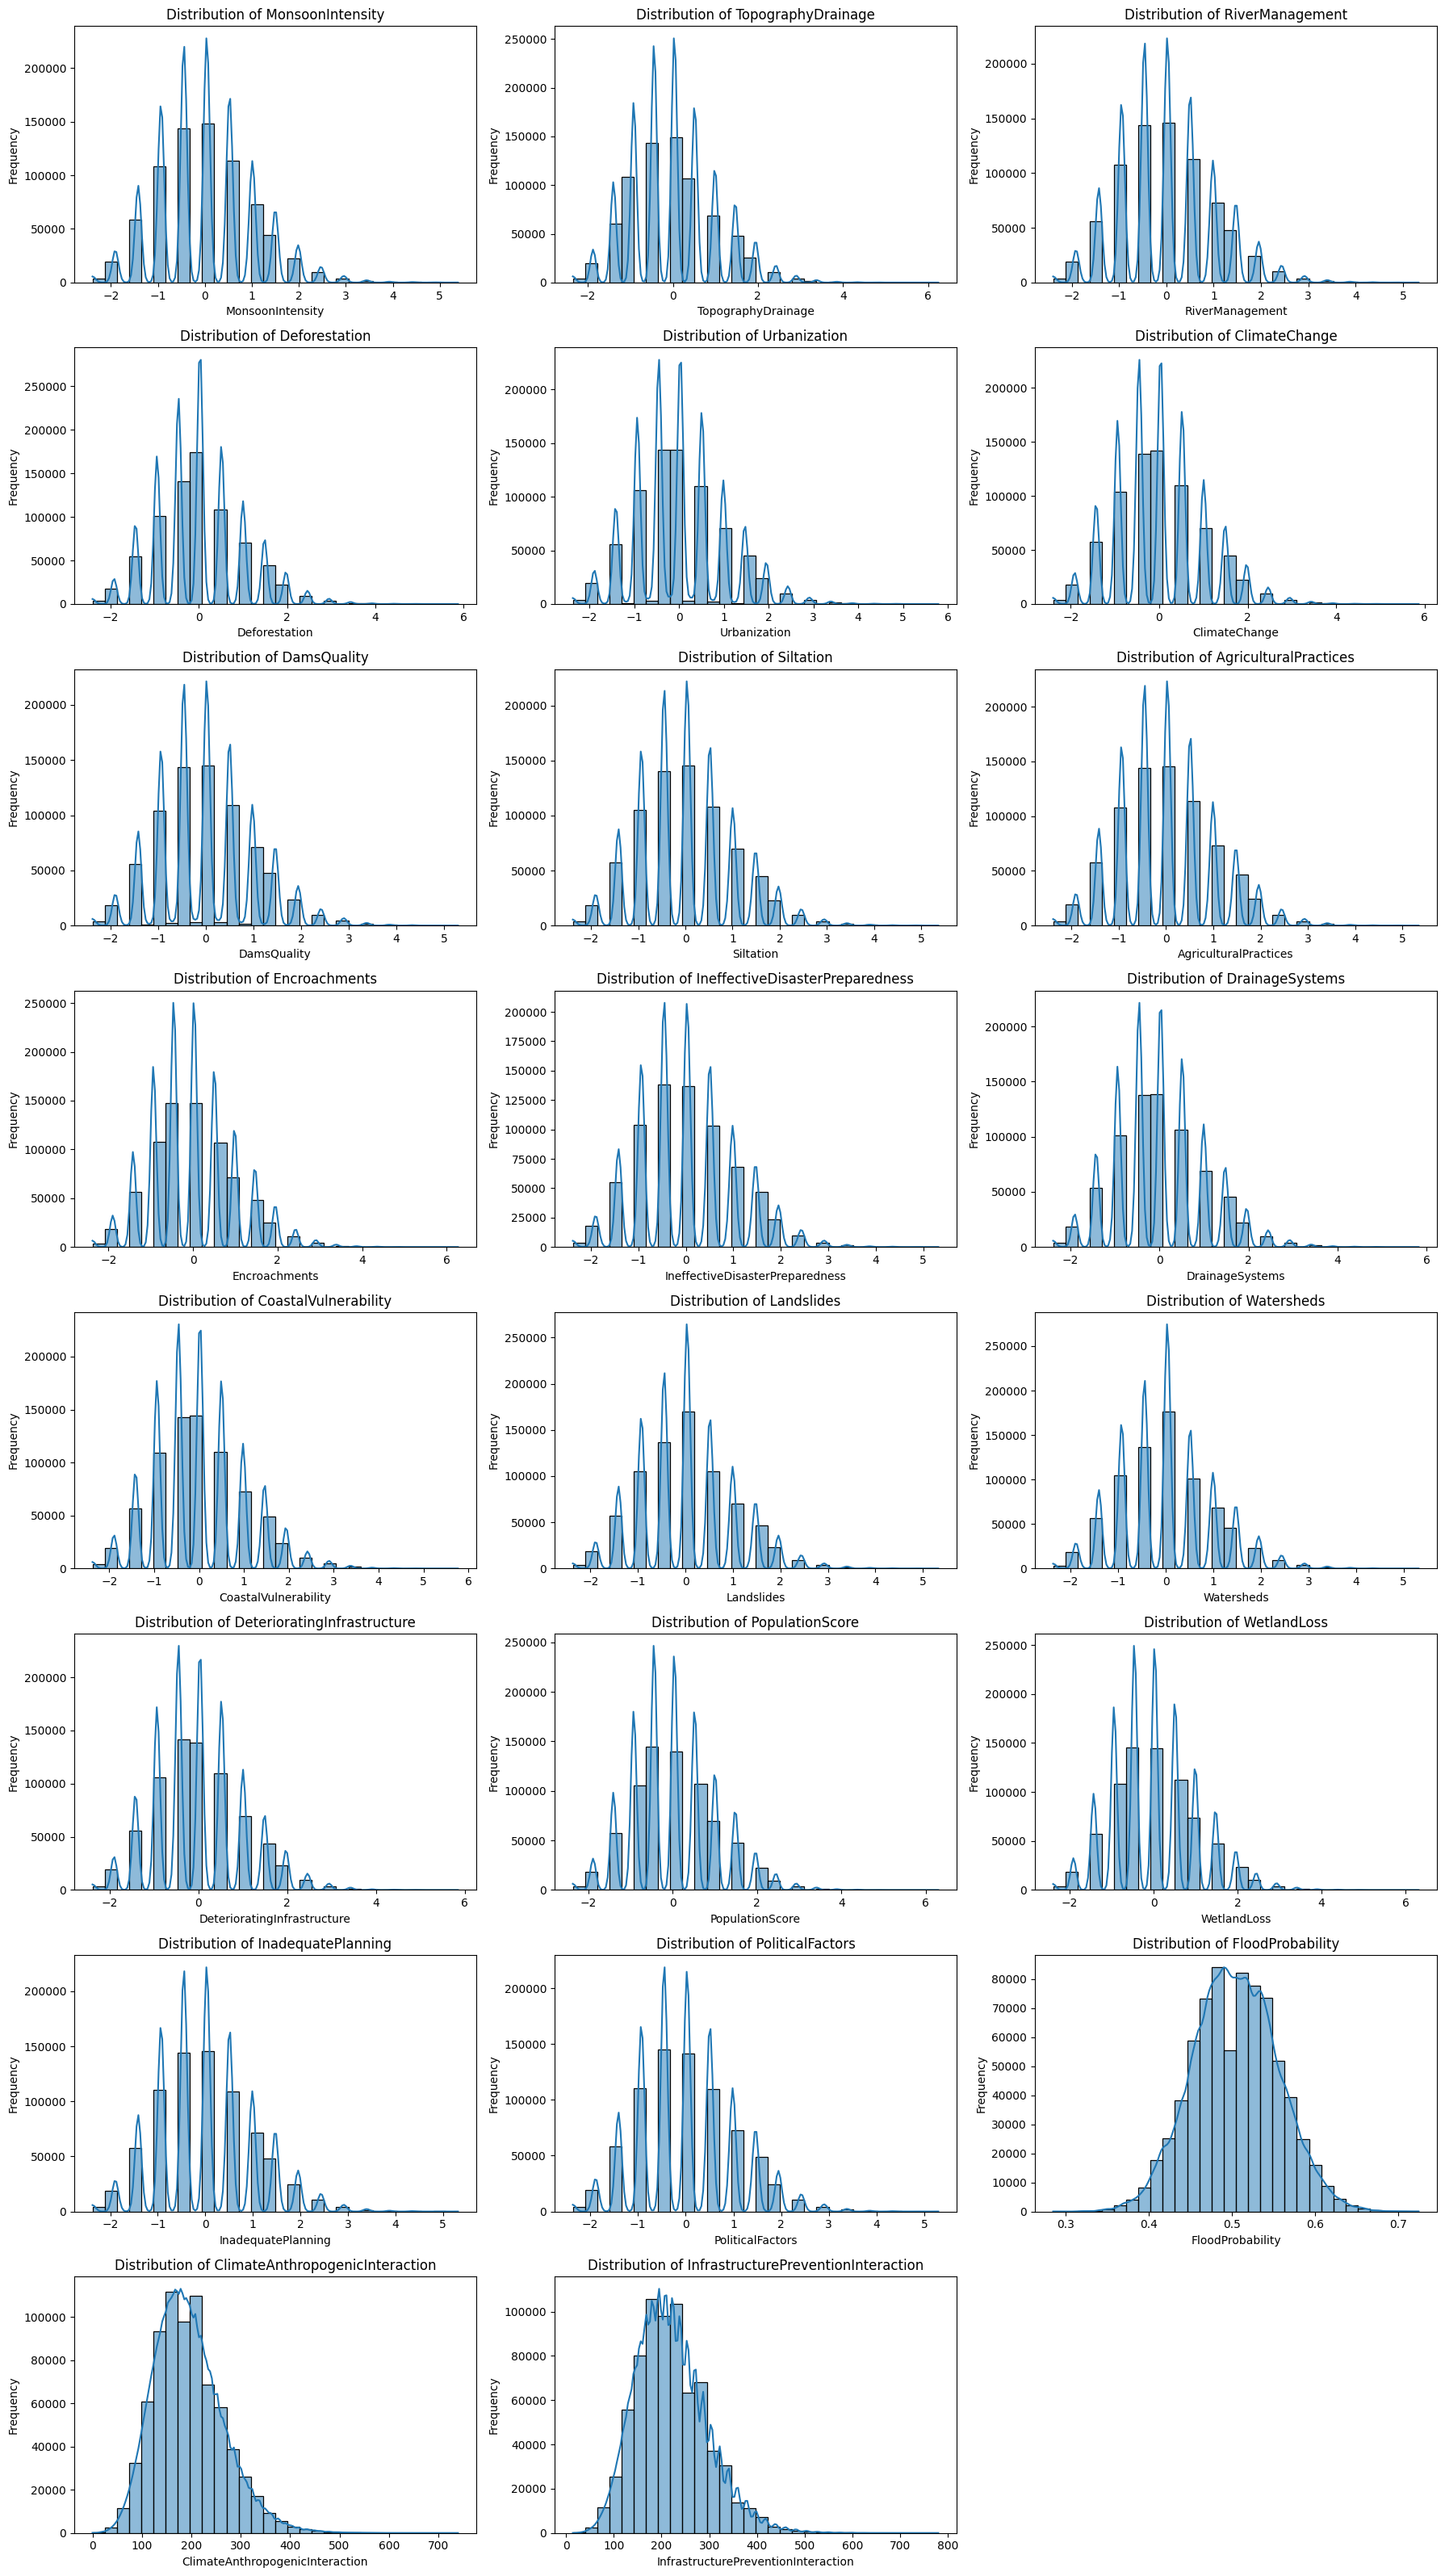

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.select(*columns).toPandas()

# Print columns to verify
print("Columns in Pandas DataFrame:", pandas_df.columns)

# Create a list of columns that exist in both the original list and the Pandas DataFrame
existing_columns = [col for col in columns if col in pandas_df.columns]

# Determine the number of rows needed for subplots
num_columns = len(existing_columns)
num_rows = (num_columns // 3) + int(num_columns % 3 != 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 4 * num_rows))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(existing_columns):
    sns.histplot(pandas_df[column].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove unused subplots
for j in range(len(existing_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [52]:
from pyspark.sql.functions import monotonically_increasing_id

# Add an index column
df_with_index = df.withColumn("index", monotonically_increasing_id())


In [53]:
def detect_outliers_zscore(spark_df, columns, threshold=3):
    outliers = {}
    
    # Add index column if not already present
    if 'index' not in spark_df.columns:
        spark_df = spark_df.withColumn("index", monotonically_increasing_id())
    
    for column in columns:
        # Calculate mean and standard deviation
        mean = spark_df.agg(F.mean(column)).collect()[0][0]
        stddev = spark_df.agg(F.stddev(column)).collect()[0][0]
        
        # Calculate z-scores
        z_scores_df = spark_df.withColumn(f'{column}_zscore', 
                                          (F.col(column) - mean) / stddev)
        
        # Identify outliers
        outliers_df = z_scores_df.filter(F.abs(F.col(f'{column}_zscore')) > threshold)
        outlier_indices = [row['index'] for row in outliers_df.select('index').collect()]
        
        outliers[column] = outlier_indices
    
    return outliers


In [54]:
zscore_outliers = detect_outliers_zscore(df_with_index, columns)


# dropping outliers based on z-score of columns and domain knowledge

# SimpleImputer with Mean Imputation for outliers

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Imputer

# Initialize SparkSession
spark = SparkSession.builder.appName("DataImputation").getOrCreate()

# Sample DataFrame (Replace this with your actual DataFrame loading)
# For example:
# df = spark.read.csv('your_data.csv', header=True, inferSchema=True)

# List of columns to impute
columns_to_impute = ['TopographyDrainage', 'Urbanization', 'DamsQuality', 
                      'Siltation', 'AgriculturalPractices', 'Landslides', 
                      'Watersheds', 'InadequatePlanning', 'ClimateAnthropogenicInteraction', 
                      'InfrastructurePreventionInteraction']

# Create an Imputer instance
imputer = Imputer(inputCols=columns_to_impute, outputCols=[col + "_imputed" for col in columns_to_impute])

# Fit and transform the DataFrame
df_imputed = imputer.fit(df).transform(df)

# Drop the original columns and rename the imputed columns
for col in columns_to_impute:
    df_imputed = df_imputed.drop(col).withColumnRenamed(col + "_imputed", col)

# Show the result
df_imputed.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, abs, mean, stddev

# Initialize SparkSession
spark = SparkSession.builder.appName("OutlierRemoval").getOrCreate()

# Sample data
data = [
    (1, 100, 2000, 0.1, 5000, 3000, 4000, 1500, 2500, 1800, 1700, 2500, 3000, 1200, 1300, 1400, 2000, 1800, 0.5, 0.6, 1.0, 0.8),
    (2, 110, 2500, 0.2, 6000, 3200, 4200, 1600, 2700, 1900, 1800, 2600, 3100, 1300, 1400, 1500, 2100, 1900, 0.6, 0.7, 1.1, 0.9),
    # Add more rows as needed
]

schema = columns  # List of column names

# Create DataFrame
df = spark.createDataFrame(data, schema=schema)

def drop_outliers_zscore(df, columns, outliers_to_drop):
    for column in columns:
        if outliers_to_drop.get(column, 0) > 0:
            # Calculate mean and standard deviation
            mean_val = df.agg(mean(col(column))).collect()[0][0]
            stddev_val = df.agg(stddev(col(column))).collect()[0][0]

            # Calculate Z-Score
            df = df.withColumn('z_score', (col(column) - mean_val) / stddev_val)

            # Identify top N outliers based on Z-Score
            top_outliers = df.withColumn('abs_z_score', abs(col('z_score'))) \
                             .orderBy(col('abs_z_score').desc()) \
                             .limit(outliers_to_drop[column])
                             
            # Collect indices of outliers to drop
            outlier_indices = top_outliers.select(col('index')).rdd.flatMap(lambda x: x).collect()
            
            # Drop the rows with top N outliers
            df = df.filter(~col('index').isin(outlier_indices))
            
            # Drop the temporary z_score column
            df = df.drop('z_score', 'abs_z_score')

    return df

# Apply function to your DataFrame
df = drop_outliers_zscore(df, columns, outliers_to_drop)

# Print the updated DataFrame shape
print("Updated DataFrame shape:", df.count())


In [ ]:
# Save the DataFrame to a CSV file
df_imputed.write.csv('D:/DBDA/project/a2/excel/updated_dataframe.csv', header=True, mode='overwrite')


In [ ]:
# Read the CSV file into a PySpark DataFrame
df1 = spark.read.csv('D:/DBDA/project/a2/excel/updated_dataframe.csv', header=True, inferSchema=True)


In [ ]:
df1